<a href="https://colab.research.google.com/github/abkerper/project_voting/blob/main/Final/FINAL_RESULTS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS 3001: Project #3**

Allison Kerper, Connor Overbay, Kiera Murphy, Annika Richardson, Taylor Toth

Understanding voting trends, especially leading up to an one as important as the US Presidential election, are critical to both political forecasters as well as presidential campaigns. Census data about population, demographic information, and political affiliation as well as economic factors like average income and prevalent job type are all important determinants of voting habits. In order to predict the outcome of the 2024 presidential election for the State of Virginia, we used a combination of these variables that have proven to be the most influential on voting habits in previous elections and built an algorithm to determine the most likely outcomes. The goal of this algorithm is to create a generic enough code to be utilized for other statewide elections and when combined will help to forecast the winner of the 2024 Presidential Election. After running the algorithm for Virginia, we were able to predict that the democratic candidate would likely win in Virginia for the upcoming election


In [ ]:
! git clone https://github.com/abkerper/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 226 (delta 46), reused 22 (delta 22), pack-reused 161
Receiving objects: 100% (226/226), 34.37 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

The first data set that this study evaluates is voting data for the presidential elections in the state of Virginia from the years 2000 - 2020. Presidential elections are held every 4 years, meaning that the dataset looks specifically at the years 2000, 2004, 2008, 2012, 2016, and 2020. For each Virginia county, the dataset gives the number of votes for the republican and democratic candidate for that year, the total amount of votes casted that year, and the mode of voting. The mode of voting is important for the 2020 election, in which that was the only year absentee ballots were allowed due to the COVID-19 pandemic. Another irregularity in the 2020 was that there were 4 more counties in the count for each year. It can be assumed that this was due to redistricting, and for consistency we excluded those counties from our analysis. For our analysis, we looked only at the 2020 elections, as we felt that would give the best predictor for this election as the candidates are the same. We deemed the 3rd party candidates irrelevant to our analysis, and focused our analysis on the difference in votes between the Republican Party and the Democratic Party. One challenge we had cleaning the data was the repetition of the counties due to the different modes of voting in the 2020 election. To address this challenge, we created a new csv file which summed all of the votes for each party by county, and only includes votes for the Democratic and Republican party. In order to achieve this, referring to Allison’s cleaning file for county results, we started by creating a separate data frame for each year. After successfully separating the data by year, we extracted the counts for both the democratic and republican parties per year using the candidate votes variable. For this analysis, because we are looking at data from the 2020 election, we later condensed the data frame further by extracting only the 2020 data regardless of voting method. The resulting csv file shows data for each election from 2000 - 2020, giving the number of votes for each party in each Virginia county and the total number of votes casted overall.  



In [ ]:
data_df = pd.read_csv("/content/project_voting/data/rep_dem_votes (1).csv") #call csv file with just democrat and republic votes
data_df.head() #display dataframe

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
3,5,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL
4,8,11169,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315,TOTAL


We created a column that shows the difference between the votes between the republican and democratic parties, which will serve as our y-value when running the regression analysis. This is a very critical factor for our ability to predict election results.  In order to find this difference between the democratic and republican votes, we started by filtering the data in a copy of the data frame for the counts by each party indivisually using the candidate votes variable. We then subtracted the number of democratic votes from the number of republican votes to get that difference, and added the column to our data frame. When looking at the added differnces column, the counties where the democratic political party won have a negative number. This is because we subtracted the number of democratic votes from republican, so the count where the democratic votes were higher than the republican results in a negative answer.

In [ ]:
#Filter data for REPUBLLICAN party
data_rep = data_df[data_df['party'] == 'REPUBLICAN'].copy() # Ensure we're working on a copy to avoid modifying the original DataFrame

# Filter data for DEMOCRAT party
data_dem = data_df[data_df['party'] == 'DEMOCRAT']

# Ensure the indices of both DataFrames are aligned
data_rep = data_rep.set_index('state')
data_dem = data_dem.set_index('state')

# Calculate the difference in candidate votes
data_rep['difference'] = data_rep['candidatevotes'] - data_dem['candidatevotes']

# Reset the index to keep 'state' as a column
data_rep.reset_index(inplace=True)
data_rep.head()

,state,Unnamed: 0.1,Unnamed: 0,year,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
0,VIRGINIA,1,11162,2000,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,1260
1,VIRGINIA,5,11166,2000,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL,2036
2,VIRGINIA,9,11170,2000,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL,594
3,VIRGINIA,13,11174,2000,VA,AMELIA,51007,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2947,4788,20220315,TOTAL,1193
4,VIRGINIA,17,11178,2000,VA,AMHERST,51009,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6660,11712,20220315,TOTAL,1848


We seperated the data into 6 different data frames to look at the election results indivisually for that election year. For our analysis, we are only looking at data for the 2020 election.

In [ ]:
data_2000r = data_rep[data_rep['year'] == 2000]
data_2004r = data_rep[data_rep['year'] == 2004]
data_2008r = data_rep[data_rep['year'] == 2008]
data_2012r = data_rep[data_rep['year'] == 2012]
data_2016r = data_rep[data_rep['year'] == 2016]
data_2020r = data_rep[data_rep['year'] == 2020]
data_2020r.head()

,state,Unnamed: 0.1,Unnamed: 0,year,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
670,VIRGINIA,2153,70388,2020,VA,ACCOMACK,51001,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,9172,16962,20220315,TOTAL,1594
671,VIRGINIA,2165,70400,2020,VA,ALBEMARLE,51003,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,20804,64657,20220315,TOTAL,-21662
672,VIRGINIA,2177,70412,2020,VA,ALLEGHANY,51005,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5859,8203,20220315,TOTAL,3616
673,VIRGINIA,2189,70424,2020,VA,AMELIA,51007,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5390,7894,20220315,TOTAL,2979
674,VIRGINIA,2201,70436,2020,VA,AMHERST,51009,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,11041,17005,20220315,TOTAL,5369


In [ ]:
#separate data by year into six new dataframes
data_2000 = data_df[(data_df['year'] == 2000)]
data_2004 = data_df[(data_df['year'] == 2004)]
data_2008 = data_df[(data_df['year'] == 2008)]
data_2012 = data_df[(data_df['year'] == 2012)]
data_2016 = data_df[(data_df['year'] == 2016)]
data_2020 = data_df[(data_df['year'] == 2020)]

 We then extracted the winning party for each county to get an overall view of the preferred party in Virginia and avoid correlation between the vote differences.

In [ ]:
data_by_year = [data_2000, data_2004, data_2008, data_2012, data_2016, data_2020] #list of each dataset
df_wins = pd.DataFrame() #create dataframe that will just include the winning rows (rows with highest votes for each year and county)

#use a for loop to run through each dataframe per year
for year in data_by_year:
    wins = pd.DataFrame() #instantiate dataframe for the winning rows
    county_names = year['county_name'].values #create a list of the counties counted for each year
    county_names = list(set(county_names)) #ensure that list is unique (no multiples)
    for county in county_names: #loop through each county in each list
        county_rows = year[year['county_name'] == county] #pull out the rows that account for each county
        max_votes = county_rows['candidatevotes'].idxmax() #find the highest number of candidatevotes per row
        winning_row = year.loc[max_votes] #pull out the row with the highest number of candidate votes
        wins = pd.concat([wins, pd.DataFrame([winning_row])], ignore_index=True) #add winning row to wins dataframe
    df_wins = pd.concat([df_wins, wins], ignore_index=True) #add each winning row to large wins dataframe

#separate wins data by year into six new dataframes
data_2000 = df_wins[df_wins['year'] == 2000]
data_2004 = df_wins[df_wins['year'] == 2004]
data_2008 = df_wins[df_wins['year'] == 2008]
data_2012 = df_wins[df_wins['year'] == 2012]
data_2016 = df_wins[df_wins['year'] == 2016]
data_2020 = df_wins[df_wins['year'] == 2020]

Here we narrow down our data to just the 2020 election year by merging the 2020 winners dataframe with the difference in votes column.

In [ ]:
#use inner merge to combine two dataframes and display first 5 rows
data_2020 = pd.merge(data_2020, data_2020r[['county_name', 'difference']], on='county_name', how='inner')
data_2020.head(5)

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,difference
0,3188,71423,2020,VIRGINIA,VA,SUSSEX,51183,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,2827,5088,20220315,TOTAL,-608
1,2381,70616,2020,VIRGINIA,VA,CHARLOTTE,51037,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3815,6191,20220315,TOTAL,1498
2,3380,71615,2020,VIRGINIA,VA,EMPORIA CITY,51595,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,1612,2384,20220315,TOTAL,-858
3,2801,71036,2020,VIRGINIA,VA,LUNENBURG,51111,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3537,6002,20220315,TOTAL,1119
4,2273,70508,2020,VIRGINIA,VA,BLAND,51021,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2903,3479,20220315,TOTAL,2371


The second data set this study evaluates is Virginia population data by county from 2020. The relevant variables we chose to evaluate against the 2020 Virginia election data were the total population, median per capita income for the past 12 months, median age overall, median age for females, median age for males, and ethnicity, including White, Black / African American, American Indian and Alaska native, Asian, Native Hawaiian / Pacific Islander, other, or a combination of 2 of the options. We chose these variables because they are found to be the best predictors for who someone is willing to vote for. For example, we found that those who identified as White were more likely to vote for the republican party.


In [ ]:
demo_2020 = pd.read_csv("/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv", encoding='latin1')

row = demo_2020.iloc[0]  # Row 0 contains the descriptions of the variables

# Prints out each cell to show variables but honestly easier to just look at the codebook
print("Variables in Dataset:")

Variables in Dataset:


<ipython-input-9-4d1738020cf8>:1: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,2

Here, we sort the data frame to ensure we are looking only at Virginia counties, and then filter out our chosen variables.

In [ ]:
demo_2020 = demo_2020[demo_2020["STUSAB"] == "VA"] # Sorts the df for just VA counties. Can change if we want to look at US as a whole
demo_2020.head()

demo_2020= demo_2020.loc[:,("COUNTY","AMPWE001","AMPWE002","AMPWE003","AMPWE004","AMPWE005",
                     "AMPWE006","AMPWE007","AMPWE008","AMTCE001","AMPLE001","AMPLE002",
                     "AMPLE003")]  #Selects variables we want in the clean df

new_column_names = {"AMPWE001" : "Total Population",
        "AMPWE002":     "White alone",
        "AMPWE003":    "Black or African American alone",
        "AMPWE004":     "American Indian and Alaska Native alone",
        "AMPWE005":     "Asian alone",
        "AMPWE006":     "Native Hawaiian and Other Pacific Islander alone",
        "AMPWE007":     "Some other race alone",
        "AMPWE008":     "Two or more races",
        "AMTCE001":     "Per Capita income in the past 12 months",
        "AMPLE001":     "Median age: Total",
        "AMPLE002":     "Median age: Male",
        "AMPLE003":     "Median age: Female",
}  #These are all taken from the codebook in the github.

demo_2020.rename(columns=new_column_names, inplace=True)
demo_2020.head()

,COUNTY,Total Population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Per Capita income in the past 12 months,Median age: Total,Median age: Male,Median age: Female
2822,Accomack County,32560,21773,9390,48,244,0,154,951,27012,45.8,42.6,47.1
2823,Albemarle County,108819,87871,10005,315,5981,48,989,3610,46241,39.4,37.7,40.7
2824,Alleghany County,15030,13925,790,0,10,0,64,241,28048,48.0,46.1,50.0
2825,Amelia County,12970,9789,2876,0,1,0,0,304,32799,45.0,44.4,48.6
2826,Amherst County,31782,24330,5758,243,209,12,203,1027,28866,44.9,42.0,46.0


As a final step to prepare our data frame for regressions and bootstrapping, we merged the two data frames together by county. By merging them by county, we now have the demographic data for each county, the winner of each election, and the party differences in one dataframe. A small challenge we encountered when trying to merge the columns is because of capitalization differnces in the county names between the data frames. To solve this, we changed all the county names to lower case in both data sets.



In [ ]:
#in each dataframe, change uppercase 'COUNTY' to lowercase 'county' in order to remain consistent with other dataframes
data_2020= data_2020.rename(columns={'county_name': 'COUNTY'})
data_2020['COUNTY'] = data_2020['COUNTY'].str.lower()
data_2020.head()

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.lower()
demo_2020.head()

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.replace(' ', '')
demo_2020['COUNTY'] = demo_2020['COUNTY'].str.replace('county', '')
data_2020['COUNTY'] = data_2020['COUNTY'].str.replace(' ', '')

demo_2020['COUNTY'] = demo_2020['COUNTY'].str.strip()
data_2020['COUNTY'] = data_2020['COUNTY'].str.strip()
merged_df_2020 = pd.merge(data_2020, demo_2020, on="COUNTY")
merged_df_2020.head()

,Unnamed: 0.1,Unnamed: 0,year,state,state_po,COUNTY,county_fips,office,candidate,party,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Per Capita income in the past 12 months,Median age: Total,Median age: Male,Median age: Female
0,3188,71423,2020,VIRGINIA,VA,sussex,51183,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,...,6254,0,63,0,84,293,24391,41.0,37.0,49.2
1,2381,70616,2020,VIRGINIA,VA,charlotte,51037,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,3321,30,43,0,26,169,24337,46.1,43.4,48.5
2,3380,71615,2020,VIRGINIA,VA,emporiacity,51595,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,...,3227,3,0,0,4,581,19612,34.8,33.5,36.5
3,2801,71036,2020,VIRGINIA,VA,lunenburg,51111,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,4148,2,61,0,327,243,21602,44.5,43.1,47.2
4,2273,70508,2020,VIRGINIA,VA,bland,51021,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,...,250,0,13,0,11,93,23664,46.1,41.9,51.3


In order to predict election results, we split the data into training and testing data. We performed a regression of the training data by regressing our relevant demographic data on the difference in votes between the republican party and democratic party.

In [ ]:
y = merged_df_2020['difference'] #let y equal the difference collumn
#select variables to compare
vars = ['Median age: Total','Per Capita income in the past 12 months','White alone','Black or African American alone','American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Some other race alone','Two or more races'] # This is a list of variables to use
#let X equal 2020 dataframe with selected variables
X = merged_df_2020.loc[:,vars]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, # Feature and target variables
                                                    test_size=.2) # For replication purposes

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train) # Fit the linear model

In [ ]:
reg0 = LinearRegression().fit(X_train, y_train) # Fit the linear model
names = reg0.feature_names_in_
coef = pd.DataFrame({'variable':names,'coefficient':reg0.coef_})

print('Intercept: ' + str(reg0.intercept_)+'\n') # Intercept value
print('R2: ' + str(reg0.score(X_train, y_train) )) # R squared measure

coef

Intercept: -2925.534818556047

R2: 0.940036363071003


,variable,coefficient
0,Median age: Total,433.907971
1,Per Capita income in the past 12 months,-0.496140
2,White alone,0.234888
3,Black or African American alone,-0.464926
4,American Indian and Alaska Native alone,-28.104626
5,Asian alone,-1.453168
6,Native Hawaiian and Other Pacific Islander alone,15.564810
7,Some other race alone,-0.709509
8,Two or more races,1.564644


In [ ]:
y_pred = reg.predict(X_test) #predict y variable from test set

rmse = mean_squared_error(y_test, y_pred)  #compute mean squared error
r2 = r2_score(y_test, y_pred) #compute r squared value from regression

print(y_pred)
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

[  2086.13999933 -14903.99266775   1755.39557933   -952.41120687
   3932.44068658   3218.60369665  10522.91515888  10916.21364925
   1534.3953997  -36368.67507753    687.19593587   3056.72527962
   1658.59622792  -2812.25352012 -11456.07105093   6814.67504895
  -2855.15287534  -3899.07727139   2439.25931988  -1387.63235027
   -228.79814766  -6836.18236522   4797.90443732  11410.83547143
   5689.43440019    247.74847888  -6844.96825387]
Root Mean Squared Error: 81218643.1524
R^2 Score: 0.6621


In [ ]:
total = y_pred.sum() #add up votes for each county
print(total)

-17776.736017166288


Our regression prediction gave us a negative value, indicating that it is llikely that the Democratic party islikely to recieve more votes than the Republican Party. We then decided to analyze the accuracy of our results by performing bootstrapping and calulating confidence intervals on each demographic variable of interest.

In [ ]:
S = 1000
K = len(names)
slopes = np.zeros([S,K])
intercepts = np.zeros(S)
r2s = np.zeros(S)
N = merged_df_2020['difference'].shape[0]

# Bootstrap:
for s in range(S):
    df_s = merged_df_2020.sample(N,replace=True,axis=0)
    y_s = df_s['difference']
    X_s = X
    #
    reg_s = LinearRegression().fit(X_s, y_s)
    slopes[s,:] = reg_s.coef_.tolist()
    intercepts[s] = reg_s.intercept_
    r2s[s] = reg_s.score(X_s,y_s)

Point Estimate:  0.06580048643436814
CI: [0.01524831 0.17625927]


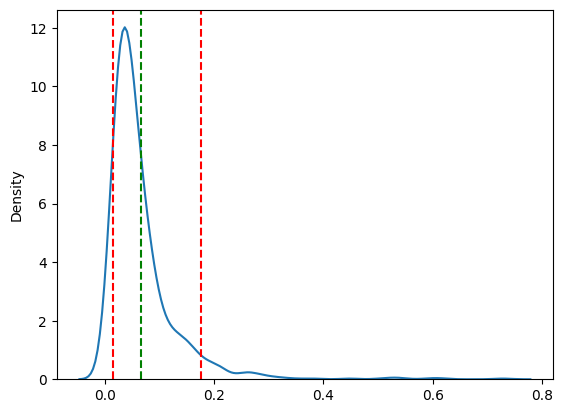

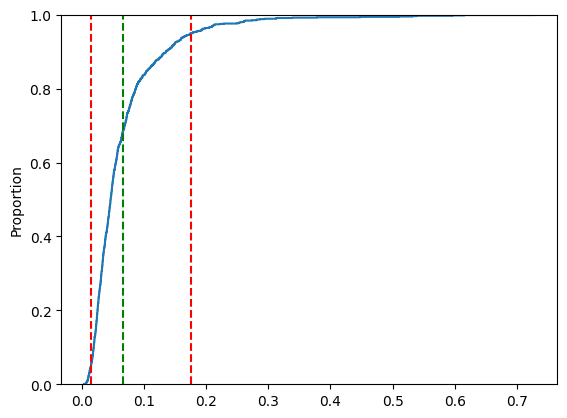

Point Estimate:  -2814.5452131169604
CI: [-33695.13956146  25940.57358498]


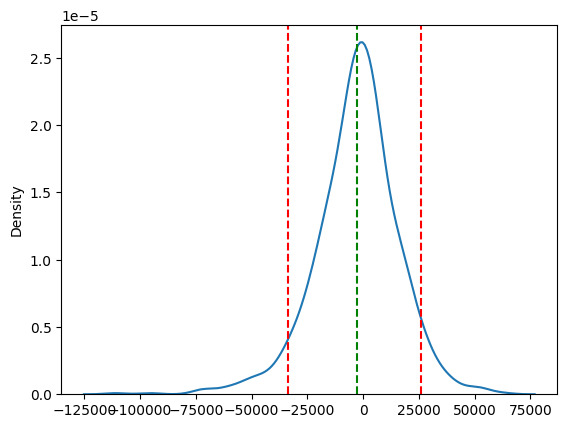

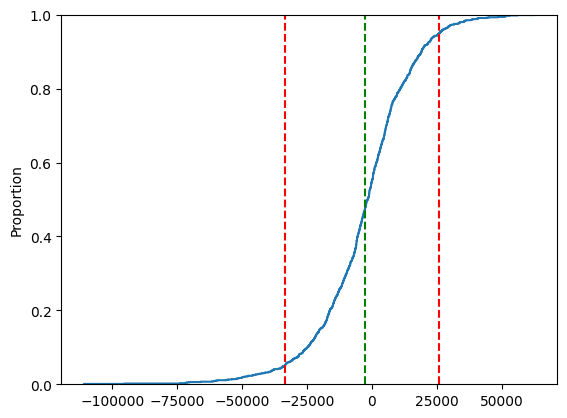

Median age: Total
Point Estimate:  -16.21323359157866
CI: [-647.40745322  631.38308138]


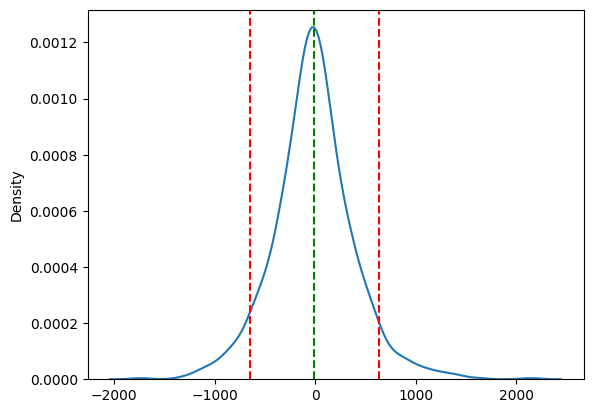

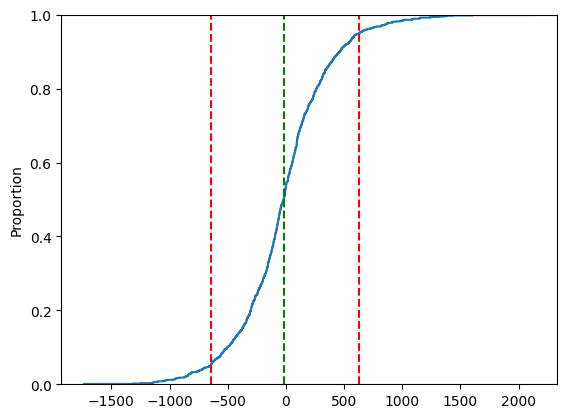

Per Capita income in the past 12 months
Point Estimate:  -0.0029436747698663437
CI: [-0.45561233  0.39664448]


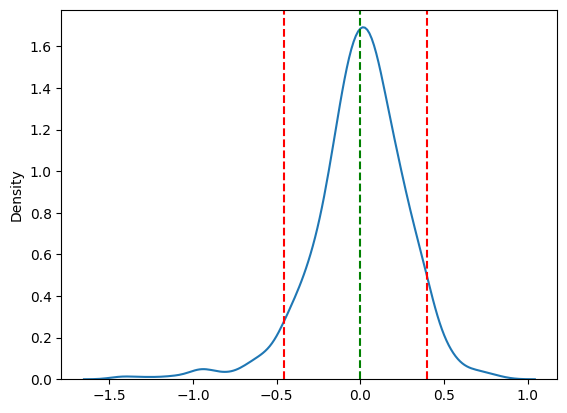

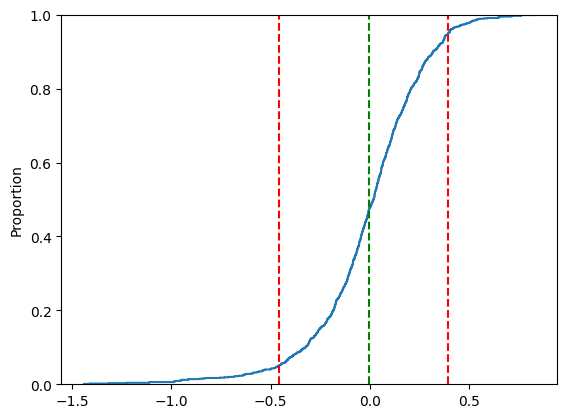

White alone
Point Estimate:  0.003947052685603797
CI: [-0.21926939  0.19883933]


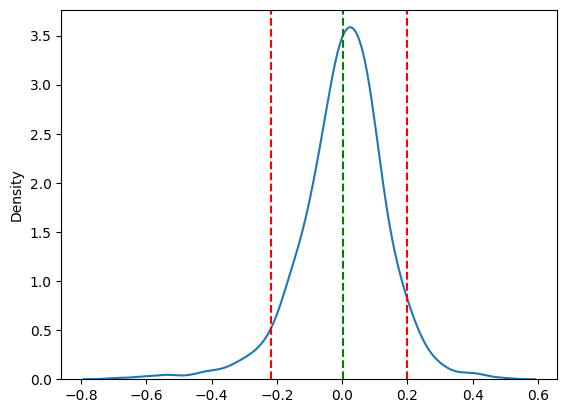

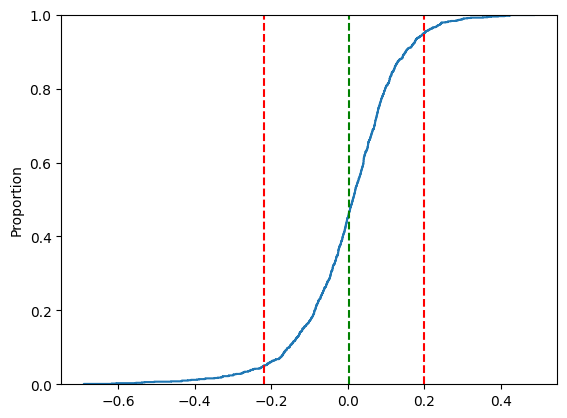

Black or African American alone
Point Estimate:  -0.0018804629940865835
CI: [-0.33903935  0.26258979]


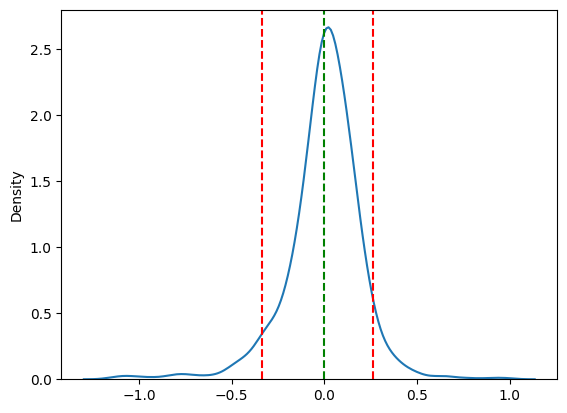

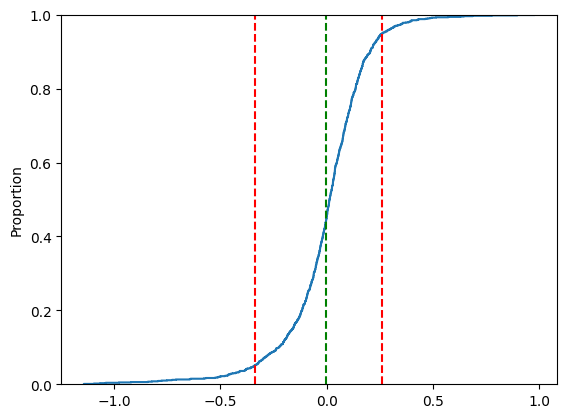

American Indian and Alaska Native alone
Point Estimate:  -0.9701652038753202
CI: [-59.95400804  42.98467577]


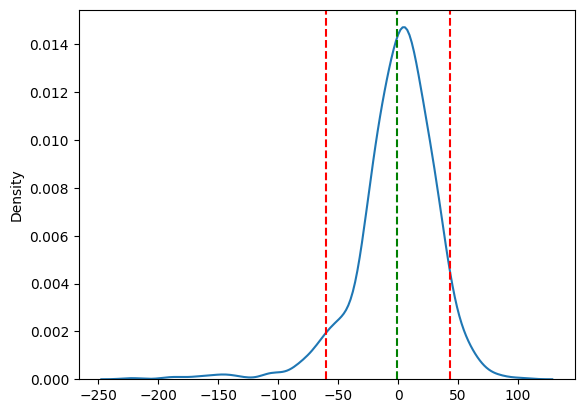

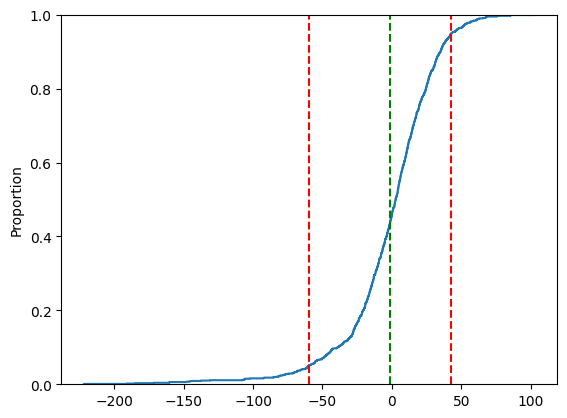

Asian alone
Point Estimate:  -0.016248034594504433
CI: [-0.53961367  0.56117834]


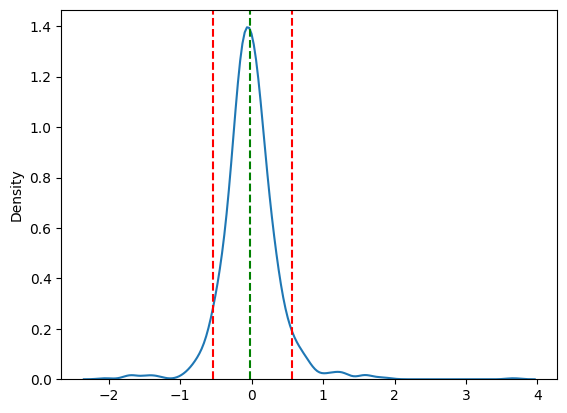

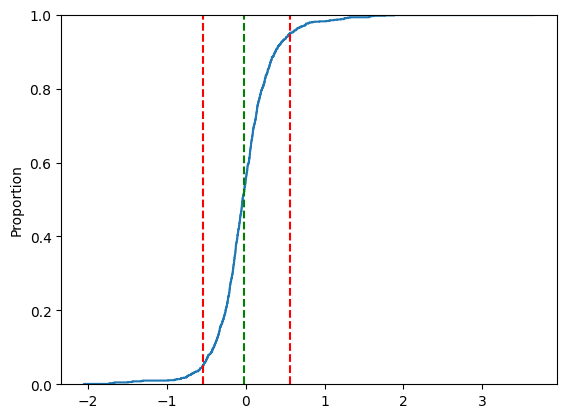

Native Hawaiian and Other Pacific Islander alone
Point Estimate:  1.500742546641405
CI: [-83.44281957  72.31250571]


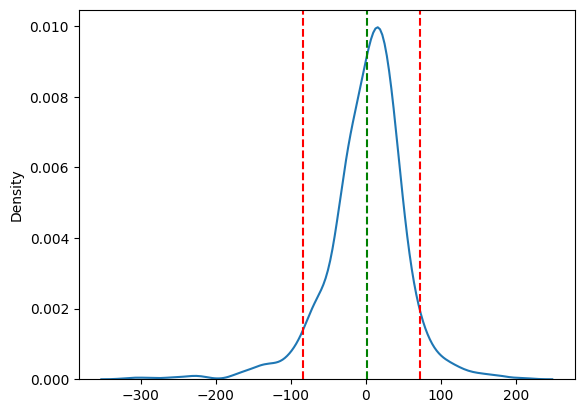

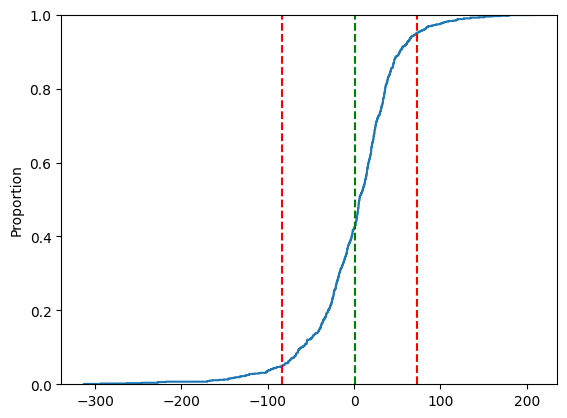

Some other race alone
Point Estimate:  0.013973164751297923
CI: [-2.15979892  2.41129846]


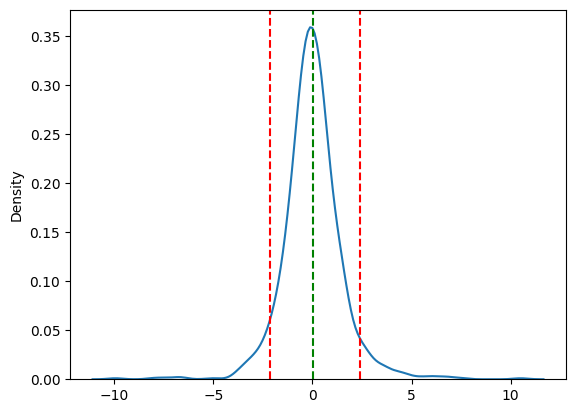

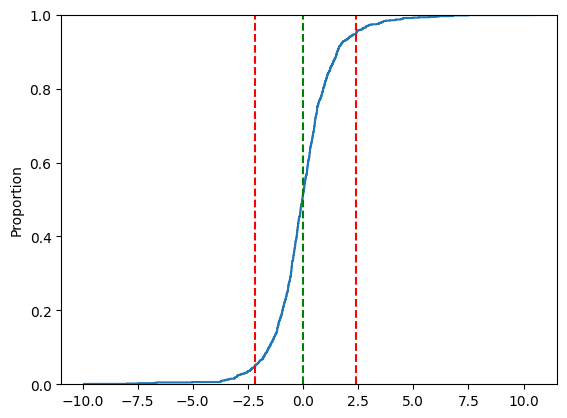

Two or more races
Point Estimate:  0.024793607116754778
CI: [-3.59840245  3.38977393]


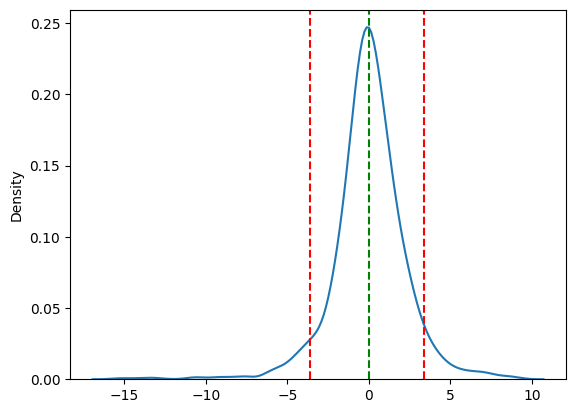

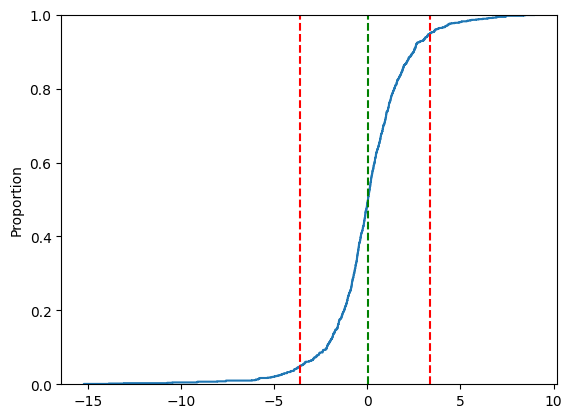

In [ ]:
def CI_eval(var): # Uncertainty analysis for var
    CI = np.quantile(var,[.05,.95]) # Compute 90% CI
    print('Point Estimate: ', var.mean())
    print( 'CI: ' + str(CI) )
    # Density plot of differences in rates, CI:
    ax = sns.kdeplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()
    # ECDF of differences in rates, CI:
    ax = sns.ecdfplot(var)
    ax.axvline(x = var.mean(),linestyle='dashed',color='green') # Point estimate
    ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
    ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
    plt.show()

CI_eval(r2s)
CI_eval(intercepts)

for k in range(K):
    print(names[k])
    CI_eval(slopes[:,k])

**Conclusion**

After running our regression and confidence interval analysis, as well as calculating a predicted value for difference in republican and democratic votes, we determined that the democratic candidate would likely win in Virginia for the upcoming election. Based on the variables that we included in our regression, the largest determinant of political affiliation was the median age of an individual in a county. The coefficient on the median age (β1 value) was ~453 suggesting that a one year increase in median voter age would lead to a 453 point difference between the Republican and Democratic votes. We found the scale of this variable to be intriguing but the direction does not seem surprising to us. Other variables in the regression seemed to have results that were fairly consistent with how we anticipated the vote count to change. The R squared value of over .9 led us to conclude that our regression did a sufficient job in predicting the vote differential, and therefore outcome, of this presidential election. Additionally, since 0 falls within our confidence interval, our values appear consistent with the data we have available.

Although we were pleased with the results that we received from the regression, there are still a few adjustments that we would make if we had more time to look for variables and test different models. As stated in the introduction and previous projects, political affiliation is in some ways a very personal decision, but in other ways a decision that can very easily be swayed by the perception of what an individual is “supposed to” believe in, especially amongst racial and economic groups. Although we only analyzed the data from 2020, it would be interesting to see if there is a correlation between different election years and determine how the coefficient values change. The direction of the coefficients would likely not change, however there could very well be a situation of one racial group voting more democratic or republican due to the actions of previous party leaders. Although the differences between years would seem to be important to the regression, we especially think our decision for one election data is sufficient because the presidential election in the upcoming year is almost certain to be a rematch between the two candidates from the 2020 election.  

We also believe that including other variables about the sentiment of individuals towards specific political questions, as seen in the first project, would be helpful in determining voting habits. If we were able to include sentiment towards especially pressing political topics, we could get an even better understanding of the overall opinion of each candidate and the likelihood of their election. Overall, there is plenty of room for improvement in this data set, but overall it is quite effective for the purposes of this project.
